# Analysis of December Experiments - Actin Channel

<font size = 4>1. Compared Actin vs  Actin (<30%) for chromocenter dots/nuclei ratio 
    
<font size = 4>2. Compared Actin vs Actin (<30%) for chromocenter dots
                                                 
Parameters **Chromocenter Volume**,**Nuclei Volume** and **Actin Coverage**
                                                 
Timestamp - **T0** - Chromocenter segmentation is tricky as they are not formed
                                                 
-**T30** - Chromocenter dots appear and Actin is imaged     
                                                 
-**T60** - Chromocenter dots are saturated (T60 can be ignored)  
                                                 
Timestamp - **Compared Shrinking vs Growing Nuclei**
    
-**Shrinking Nuclei** - Where nuclei shrinks at T60/T30 with T0 reference i.e (less than 1.2 in ratio)
                                                 
-**Non-Shrinking Nuclei** - Where nuclei grows at T60/T30 with T0 reference i.e (more than 1.2 in ratio)
                                         

# Analysis of Actin vs Control 
    
<font size = 4>Compared difference of chromocenter volume (<30%)
                                                                                                                        
**Two plots**                                                     
Categorized in **Shrinking Nuclei** vs **Non-Shrinking Nuclei**                                    

4


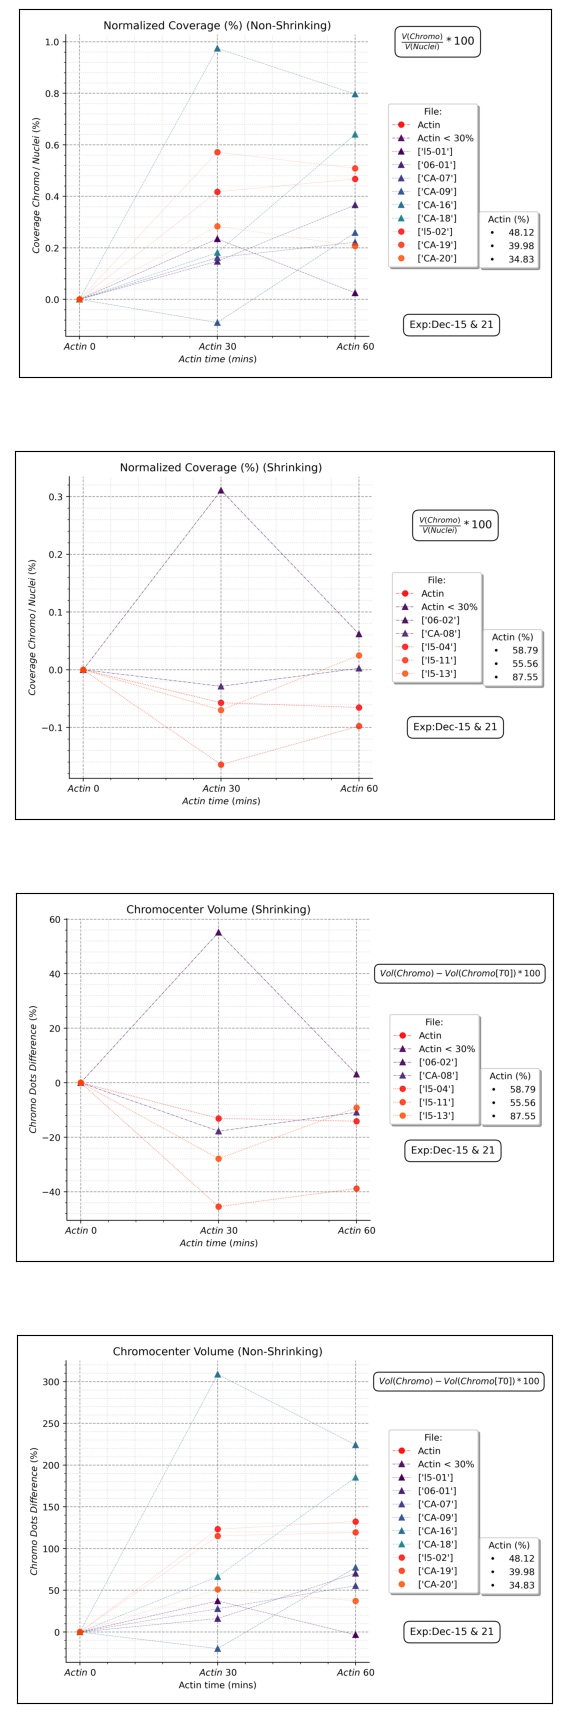

In [71]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in sorted(glob.glob('C:/Users/kaabi/Documents/Nuceli_Data/Enucleation/221221 OF1 Enuc D05 Time lapse-Track/ActinO30 vs ActinL30/Plots/*.png')):
    images.append(mpimg.imread(img_path))
print(len(images))
    
plt.figure(figsize=(22,22))
columns = 1
for i, image in enumerate(images):
    plt.subplot(int(len(images)/columns),columns, i+1)
    #plt.subplot(int(len(images) / columns), columns, i+1)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])


In [13]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from itertools import zip_longest
import matplotlib.colors as colors
import matplotlib.cm as cmx
import itertools
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
# Colormap A
Ncolors_A = 7
colormap_A = plt.cm.autumn#Accent# Set2# autumn # Wistia #cividis #viridis# LinearSegmentedColormap #https://matplotlib.org/stable/tutorials/colors/colormaps.html
Ncolors_A = min(colormap_A.N,Ncolors_A)
mapcolors_A = [colormap_A(int(x*colormap_A.N/Ncolors_A)) for x in range(Ncolors_A)]
# Colormap B
Ncolors_B = 11
colormap_B = plt.cm.viridis#Paired#tab20c# viridis# LinearSegmentedColormap
Ncolors_B = min(colormap_B.N,Ncolors_B)
mapcolors_B = [colormap_B(int(x*colormap_B.N/Ncolors_B)) for x in range(Ncolors_B)]

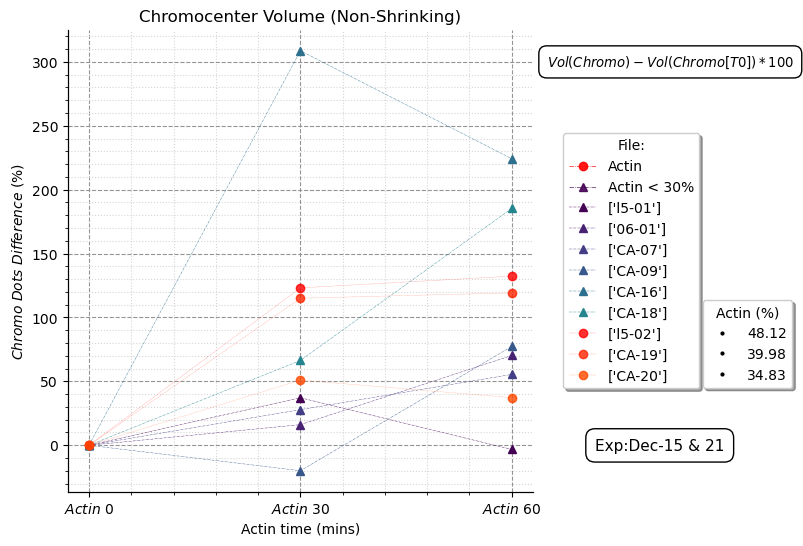

In [14]:
# =============================================================================
# ACTIN vs ACTIN LESS THAN 30% INFLATING/NON-SHRINKING CHANNEL - <1.2
# FOR 15/12/22 + 21/12/22
#
# Chromocenter Volume Implementation
#(ChromoVolume/NucleiVolume-ChromoVolume[0]/NucleiVolume[0]*100) # Subtracting with T0 Volume and dividing by nuclei volume
# To get the percentage of change for each nuclei compared to the chromocenter
# =============================================================================
# Chromocenter Volume
# ====
# Merging Actin DF First o
df_actin_1 = pd.read_excel('C:/Users/kaabi/Documents/Nuceli_Data/Enucleation/221221 OF1 Enuc D05 Time lapse-Track/Output/Export_Actin_Ovr_30_Less_noShrink_1p2_R2.xlsx')
df_actin_2 = pd.read_excel('C:/Users/kaabi/Documents/Nuceli_Data/Enucleation/221215 OF1 Enuc D05 Time lapse-Track/Output/Export_Actin_Ovr_30_Less_noShrink_1p2_R2.xlsx')
df_actin_A = pd.concat([df_actin_1, df_actin_2])
# ====
#df_actin_A = pd.read_excel('C:/Users/kaabi/Documents/Nuceli_Data/Imaris_to_Py/Output/Export_Actin_Ovr_30_1p2_R2.xlsx')
Chromo_volume_A = pd.DataFrame(df_actin_A, columns= ['VCA_chromo_volume_0','VCA_chromo_volume_1','VCA_chromo_volume_2'])
Chromo_volume_A_np = np.array(Chromo_volume_A)
#Chromo_volume_A_np = np.subtract(Chromo_volume_A_np.T,Chromo_volume_A_np[:,0]).T # to divide each element with T0
# Nuclei Volume
Nuclei_volume_A  = pd.DataFrame(df_actin_A, columns= ['nuclei_vca_0','nuclei_vca_1','nuclei_vca_2'])
Nuclei_volume_A_np = np.array(Nuclei_volume_A)

#Chromo_nuclei_rati_A = np.divide(Chromo_volume_A_np,Nuclei_volume_A_np)
Chromo_nuclei_rati_A = np.subtract(Chromo_volume_A_np.T,Chromo_volume_A_np[:,0]).T
Chromo_nuclei_rati_A = np.multiply(Chromo_nuclei_rati_A,100)

# ====
# Actually ACTIN DATA Transformed for Ctrl plotting for coverage less than 30%
df_ctrl_3 = pd.read_excel('C:/Users/kaabi/Documents/Nuceli_Data/Enucleation/221221 OF1 Enuc D05 Time lapse-Track/Output/Export_Actin_Low_30_Less_noShrink_1p2_R2.xlsx')
df_ctrl_4 = pd.read_excel('C:/Users/kaabi/Documents/Nuceli_Data/Enucleation/221215 OF1 Enuc D05 Time lapse-Track/Output/Export_Actin_Low_30_Less_noShrink_1p2_R2.xlsx')

# Drop Actin Columns
df_ctrl_merge_B = pd.concat([df_ctrl_3, df_ctrl_4])
column_nam = ['actin_area_60', 'actin_area_30']
df_ctrl_merge_B.drop(column_nam, inplace=True, axis=1)
# Better way to fix/Rename Columns
df_ctrl_merge_B.columns = ['Unnamed: 0','File_Name_Ctrl','Ctrl_chromo_volume_0','Ctrl_chromo_volume_1','Ctrl_chromo_volume_2',
           'Ctrl_chromo_volume_3','Ctrl_chromo_count_0','Ctrl_chromo_count_1','Ctrl_chromo_count_2',
           'Ctrl_chromo_count_3','nuclei_ctrl_0','nuclei_ctrl_1','nuclei_ctrl_2','nuclei_ctrl_3',
           'sphericity_ctrl_0','sphericity_ctrl_1','sphericity_ctrl_2','sphericity_ctrl_3','Ratio1',
           'Ratio2']

df_ctrl_B = df_ctrl_merge_B
#
Chromo_volume_B = pd.DataFrame(df_ctrl_B, columns= ['Ctrl_chromo_volume_0','Ctrl_chromo_volume_1','Ctrl_chromo_volume_2'])
Chromo_volume_B_np  = np.array(Chromo_volume_B)
#Chromo_volume_B_np = np.subtract(Chromo_volume_B_np.T,Chromo_volume_B_np[:,0]).T
Nuclei_volume_B  = pd.DataFrame(df_ctrl_B, columns= ['nuclei_ctrl_0','nuclei_ctrl_1','nuclei_ctrl_2'])
Nuclei_volume_B_np = np.array(Nuclei_volume_B)

#Chromo_nuclei_rati_B = np.divide(Chromo_volume_B_np,Nuclei_volume_B_np)
Chromo_nuclei_rati_B = np.subtract(Chromo_volume_B_np.T,Chromo_volume_B_np[:,0]).T
Chromo_nuclei_rati_B = np.multiply(Chromo_nuclei_rati_B,100)

#df_actin_C = pd.concat([df_actin_B, df_actin_A]) # Merge two experiment readings

# Actin Coverage
Coverage_per_A = pd.DataFrame(df_actin_A, columns= ['actin_area_60'])
Coverage_per_A_np = np.array(Coverage_per_A)

Coverage_per_B = pd.DataFrame(df_ctrl_B, columns= ['actin_area_60'])
Coverage_per_B_np = np.array(Coverage_per_B)
#Coverage_per_B_np = np.concatenate((Coverage_per_A_np, Coverage_per_B_np), axis=0)

# getFileName
FileNum_A = pd.DataFrame(df_actin_A, columns= ['File_Name_VCA'])
FileNum_A_np = np.array(FileNum_A)
FileNum_B = pd.DataFrame(df_ctrl_B, columns= ['File_Name_Ctrl'])
FileNum_B_np = np.array(FileNum_B)


coordinates_A = [
    dict(
        y=Chromo_nuclei_rati_A[i,:], # Comparing rows of timestamps
        x= np.arange(0, len(Chromo_nuclei_rati_A[0]),1),legend =FileNum_A_np[i],
        act_Cov=Coverage_per_A_np[i] )
        #x=len(Chromo_volume_A_np[0])
        
    for i in range(len(Chromo_nuclei_rati_A))
]

coordinates_B = [
    dict(
        y=Chromo_nuclei_rati_B[i,:], # Comparing rows of timestamps
        x= np.arange(0, len(Chromo_nuclei_rati_B[0]),1),legend =FileNum_B_np[i],
        act_Cov=Coverage_per_B_np[i] )
        #x=len(Chromo_volume_A_np[0])
        
    for i in range(len(Chromo_nuclei_rati_B))
]

plot_Label = np.array(['0']) # For empty labelling the legends 

fig, ax = plt.subplots(figsize=(6, 6))
ax2 = ax.twinx()

# Add legend for Actin CTRL
for c,color in zip(plot_Label, mapcolors_A): 
    ax.plot([], [],marker="o", alpha=0.9, color=color,linestyle='-.',linewidth=0.5, label='Actin')
    ax.legend(loc="lower left")
for c,color in zip(plot_Label, mapcolors_B): 
    ax.plot([], [],marker="^", alpha=0.9, color=color,linestyle='-.',linewidth=0.5, label='Actin < 30%')

for c,color in zip(coordinates_B, mapcolors_B):
    #for c,color in zip(coordinates_B, mapcolors):
    #for i,(marker,linestyle,color) in zip(range(N),itertools.product(m_styles,l_styles, mapcolors)):
    ax.plot(c['x'], c['y'],marker="^", alpha=1, color=color,linestyle='-.',linewidth=0.3, label=c['legend'])
    patches = [ plt.plot([],[], marker='^', ms=2, ls="",c='k', mec=None, 
            label="{:.2f}".format(float(Coverage_per_B_np[i])) )[0]  for i in range(len(Coverage_per_B_np)) ]    
    
    # Sync location for Coordinates B
    ax2.legend(handles=patches,loc='center left', bbox_to_anchor=(1.3, 0.5),title="Actin (%)",fancybox=True,shadow=True)
    ax2.axes.get_yaxis().set_visible(False)
    
#Greater than 1.2  A  Shrinkage
#for c,f in zip_longest(coordinates_a, coordinates_b, fillvalue='0'):
for c,color in zip(coordinates_A, mapcolors_A):   
    ax.plot(c['x'], c['y'],marker="o", alpha=0.8, color=color ,linestyle=':',linewidth=0.3, label=c['legend'])
    ax.set_title('Chromocenter Volume (Non-Shrinking)')
    categories = [r'$Actin\ 0$',r'$Actin\ 30$', r'$Actin\ 60$']
    ax.set_xticks(range(len(categories)), categories)
    ax.set_ylabel(r'$Chromo\ Dots\ Difference\ (\%)$') #(\mu m^{3})
    ax.set_xlabel('Actin time (mins)')
    #ax.annotate(c['A2'], xy=(0.5, 0.5), xycoords=ax.transAxes)
    
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.legend()
    ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),title="File:",fancybox=True,shadow=True )
    
    patches = [ plt.plot([],[], marker='o', ms=2, ls="",c='k', mec=None, 
            label="{:.2f}".format(float(Coverage_per_A_np[i])) )[0]  for i in range(len(Coverage_per_A_np)) ]    

    
    ax2.legend(handles=patches,loc='center left', bbox_to_anchor=(1.35, 0.32),title="Actin (%)",fancybox=True,shadow=True)
    ax2.axes.get_yaxis().set_visible(False)

# Experiment Date                           
t = ax.text(
    2.7, -0.1, "Exp:Dec-15 & 21", ha="center", va="center", size=11,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="white", ec="k", lw=1))
bb = t.get_bbox_patch()
bb.set_boxstyle("round", pad=0.6)

t = ax.text(
    2.75, 300, r'$Vol(Chromo)-Vol(Chromo[T0])*100$', ha="center", va="center", size=9.5,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="white", ec="k", lw=1))
bb = t.get_bbox_patch()
bb.set_boxstyle("round", pad=0.6)
#ax.set_ylim([0, 2.8])
ax.spines[['right', 'top']].set_visible(False)  
ax.grid(which='minor', color='#d6d6d6', linestyle=':')
ax.grid(which='major', color='#949494', linestyle='--')
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.savefig('ChromoVol_Expand_Actin_vs_ACTIN_low30_Dec_22.png', dpi=400, bbox_inches="tight", pad_inches=0.2)
plt.show()    



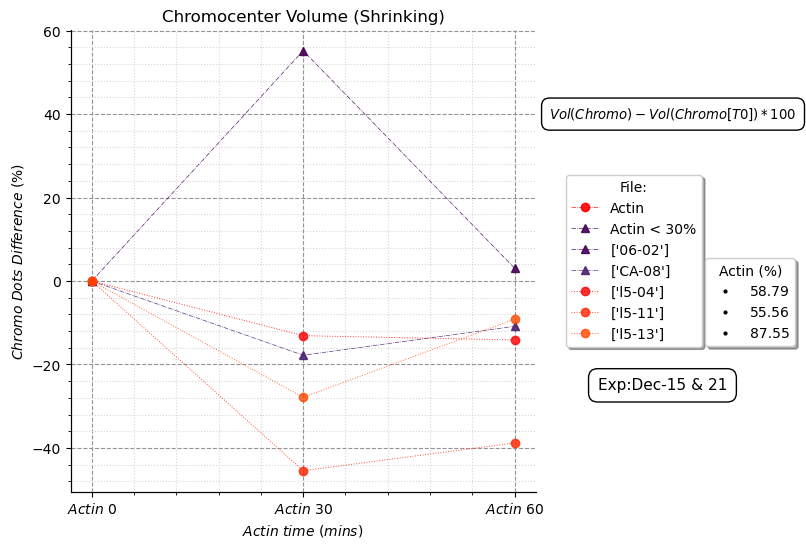

In [15]:

  # =============================================================================
# ACTIN vs ACTIN LESS THAN 30% SHRINKING CHANNEL  > 1.2
# FOR 15/12/22 + 21/12/22
#
# Chromocenter Volume Implementation
#(ChromoVolume/NucleiVolume-ChromoVolume[0]/NucleiVolume[0]*100) # Subtracting with T0 Volume and dividing by nuclei volume
# To get the percentage of change for each nuclei compared to the chromocenter
# =============================================================================
# Chromocenter Volume
# ====
# Merging Actin DF First o
df_actin_1 = pd.read_excel('C:/Users/kaabi/Documents/Nuceli_Data/Enucleation/221221 OF1 Enuc D05 Time lapse-Track/Output/Export_Actin_Ovr_30_SHR_1p2_R2.xlsx')
df_actin_2 = pd.read_excel('C:/Users/kaabi/Documents/Nuceli_Data/Enucleation/221215 OF1 Enuc D05 Time lapse-Track/Output/Export_Actin_Ovr_30_SHR_1p2_R2.xlsx')
df_actin_A = pd.concat([df_actin_1, df_actin_2])
# ====
#df_actin_A = pd.read_excel('C:/Users/kaabi/Documents/Nuceli_Data/Imaris_to_Py/Output/Export_Actin_Ovr_30_1p2_R2.xlsx')
#Chromo_volume_A = pd.DataFrame(df_actin_A, columns= ['VCA_chromo_volume_0','VCA_chromo_volume_1','VCA_chromo_volume_2'])
Chromo_volume_A = pd.DataFrame(df_actin_A, columns= ['VCA_chromo_volume_0','VCA_chromo_volume_1','VCA_chromo_volume_2'])
Chromo_volume_A_np = np.array(Chromo_volume_A)
#Chromo_volume_A_np = np.subtract(Chromo_volume_A_np.T,Chromo_volume_A_np[:,0]).T # to divide each element with T0
# Nuclei Volume
Nuclei_volume_A  = pd.DataFrame(df_actin_A, columns= ['nuclei_vca_0','nuclei_vca_1','nuclei_vca_2'])
Nuclei_volume_A_np = np.array(Nuclei_volume_A)

#Chromo_nuclei_rati_A = np.divide(Chromo_volume_A_np,Nuclei_volume_A_np)
Chromo_nuclei_rati_A = np.subtract(Chromo_volume_A_np.T,Chromo_volume_A_np[:,0]).T
Chromo_nuclei_rati_A = np.multiply(Chromo_nuclei_rati_A,100)

# ====

# Actually ACTIN DATA Transformed for Ctrl plotting for coverage less than 30%
df_ctrl_3 = pd.read_excel('C:/Users/kaabi/Documents/Nuceli_Data/Enucleation/221221 OF1 Enuc D05 Time lapse-Track/Output/Export_Actin_Low_30_Over_SHR_1p2_R2.xlsx')
df_ctrl_4 = pd.read_excel('C:/Users/kaabi/Documents/Nuceli_Data/Enucleation/221215 OF1 Enuc D05 Time lapse-Track/Output/Export_Actin_Low_30_Over_SHR_1p2_R2.xlsx')

# Drop Actin Columns
df_ctrl_merge_B = pd.concat([df_ctrl_3, df_ctrl_4])
column_nam = ['actin_area_60', 'actin_area_30']
df_ctrl_merge_B.drop(column_nam, inplace=True, axis=1)
# Better way to fix/Rename Columns
df_ctrl_merge_B.columns = ['Unnamed: 0','File_Name_Ctrl','Ctrl_chromo_volume_0','Ctrl_chromo_volume_1','Ctrl_chromo_volume_2',
           'Ctrl_chromo_volume_3','Ctrl_chromo_count_0','Ctrl_chromo_count_1','Ctrl_chromo_count_2',
           'Ctrl_chromo_count_3','nuclei_ctrl_0','nuclei_ctrl_1','nuclei_ctrl_2','nuclei_ctrl_3',
           'sphericity_ctrl_0','sphericity_ctrl_1','sphericity_ctrl_2','sphericity_ctrl_3','Ratio1',
           'Ratio2']

df_ctrl_B =df_ctrl_merge_B
#
#df_actin_B = pd.read_excel('C:/Users/kaabi/Documents/Nuceli_Data/Imaris_to_Py/Output/Export_Actin_Ovr_30_Less_1p2_R2.xlsx')
##########Chromo_volume_A_np = pd.DataFrame(df_ctrl_A, columns= ['Ctrl_chromo_volume_0','Ctrl_chromo_volume_1','Ctrl_chromo_volume_2'])
Chromo_volume_B = pd.DataFrame(df_ctrl_B, columns= ['Ctrl_chromo_volume_0','Ctrl_chromo_volume_1','Ctrl_chromo_volume_2'])
Chromo_volume_B_np  = np.array(Chromo_volume_B)
#Chromo_volume_B_np = np.subtract(Chromo_volume_B_np.T,Chromo_volume_B_np[:,0]).T
Nuclei_volume_B  = pd.DataFrame(df_ctrl_B, columns= ['nuclei_ctrl_0','nuclei_ctrl_1','nuclei_ctrl_2'])
Nuclei_volume_B_np = np.array(Nuclei_volume_B)

#Chromo_nuclei_rati_B = np.divide(Chromo_volume_B_np,Nuclei_volume_B_np)
Chromo_nuclei_rati_B = np.subtract(Chromo_volume_B_np.T,Chromo_volume_B_np[:,0]).T
Chromo_nuclei_rati_B = np.multiply(Chromo_nuclei_rati_B,100)

#df_actin_C = pd.concat([df_actin_B, df_actin_A]) # Merge two experiment readings

# Actin Coverage
Coverage_per_A = pd.DataFrame(df_actin_A, columns= ['actin_area_60'])
Coverage_per_A_np = np.array(Coverage_per_A)

Coverage_per_B = pd.DataFrame(df_ctrl_B, columns= ['actin_area_60'])
Coverage_per_B_np = np.array(Coverage_per_B)
#Coverage_per_B_np = np.concatenate((Coverage_per_A_np, Coverage_per_B_np), axis=0)

# getFileName
FileNum_A = pd.DataFrame(df_actin_A, columns= ['File_Name_VCA'])
FileNum_A_np = np.array(FileNum_A)
FileNum_B = pd.DataFrame(df_ctrl_B, columns= ['File_Name_Ctrl'])
FileNum_B_np = np.array(FileNum_B)


coordinates_A = [
    dict(
        y=Chromo_nuclei_rati_A[i,:], # Comparing rows of timestamps
        x= np.arange(0, len(Chromo_nuclei_rati_A[0]),1),legend =FileNum_A_np[i],
        act_Cov=Coverage_per_A_np[i] )
        #x=len(Chromo_volume_A_np[0])
        
    for i in range(len(Chromo_nuclei_rati_A))
]

coordinates_B = [
    dict(
        y=Chromo_nuclei_rati_B[i,:], # Comparing rows of timestamps
        x= np.arange(0, len(Chromo_nuclei_rati_B[0]),1),legend =FileNum_B_np[i],
        act_Cov=Coverage_per_B_np[i] )
        #x=len(Chromo_volume_A_np[0])
        
    for i in range(len(Chromo_nuclei_rati_B))
]

plot_Label = np.array(['0'])

fig, ax = plt.subplots(figsize=(6, 6))
ax2 = ax.twinx()

# Add legend for Actin CTRL
for c,color in zip(plot_Label, mapcolors_A): 
    ax.plot([], [],marker="o", alpha=0.9, color=color,linestyle='-.',linewidth=0.5, label='Actin')
    ax.legend(loc="lower left")
for c,color in zip(plot_Label, mapcolors_B): 
    ax.plot([], [],marker="^", alpha=0.9, color=color,linestyle='-.',linewidth=0.5, label='Actin < 30%')

for c,color in zip(coordinates_B, mapcolors_B):
    #for c,color in zip(coordinates_B, mapcolors):
    #for i,(marker,linestyle,color) in zip(range(N),itertools.product(m_styles,l_styles, mapcolors)):
    ax.plot(c['x'], c['y'],marker="^", alpha=0.9, color=color,linestyle='-.',linewidth=0.5, label=c['legend'])
    patches = [ plt.plot([],[], marker='^', ms=2, ls="",c='k', mec=None, 
            label="{:.2f}".format(float(Coverage_per_B_np[i])) )[0]  for i in range(len(Coverage_per_B_np)) ]    
    
    # Sync location for Coordinates B
    ax2.legend(handles=patches,loc='center left', bbox_to_anchor=(1.3, 0.6),title="Actin (%)",fancybox=True,shadow=True)
    ax2.axes.get_yaxis().set_visible(False)
    
#Greater than 1.2  A  Shrinkage
#for c,f in zip_longest(coordinates_a, coordinates_b, fillvalue='0'):
for c,color in zip(coordinates_A, mapcolors_A):   
    ax.plot(c['x'], c['y'],marker="o", alpha=0.8, color=color ,linestyle=':',linewidth=0.7, label=c['legend'])
    ax.set_title('Chromocenter Volume (Shrinking)')
    categories = [r'$Actin\ 0$',r'$Actin\ 30$', r'$Actin\ 60$']
    ax.set_xticks(range(len(categories)), categories)
    ax.set_ylabel(r'$ Chromo\ Dots\ Difference\ (\%) $') #(\mu m^{3})
    ax.set_xlabel(r'$Actin\ time\ (mins)$')
    #ax.annotate(c['A2'], xy=(0.5, 0.5), xycoords=ax.transAxes)
    
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.legend()
    ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),title="File:",fancybox=True,shadow=True )
    
    patches = [ plt.plot([],[], marker='o', ms=2, ls="",c='k', mec=None, 
            label="{:.2f}".format(float(Coverage_per_A_np[i])) )[0]  for i in range(len(Coverage_per_A_np)) ]    

    
    ax2.legend(handles=patches,loc='center left', bbox_to_anchor=(1.35, 0.41),title="Actin (%)",fancybox=True,shadow=True)
    ax2.axes.get_yaxis().set_visible(False)
    
# Experiment Date                           
t = ax.text(
    2.7, -25, "Exp:Dec-15 & 21", ha="center", va="center", size=11,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="white", ec="k", lw=1))
bb = t.get_bbox_patch()
bb.set_boxstyle("round", pad=0.6)


t = ax.text(
    2.75, 40, r'$Vol(Chromo)-Vol(Chromo[T0])*100$', ha="center", va="center", size=9.5,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="white", ec="k", lw=1))
bb = t.get_bbox_patch()
bb.set_boxstyle("round", pad=0.6)

#ax.set_ylim([0, 2.8])
ax.spines[['right', 'top']].set_visible(False)  
ax.grid(which='minor', color='#d6d6d6', linestyle=':') ##ededed,#a8a8a8
ax.grid(which='major', color='#949494', linestyle='--')
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.savefig('ChromoVol_Shrink_Actin_vs_Actin_Low_30_Dec_22.png', dpi=400, bbox_inches="tight", pad_inches=0.2)
plt.show()

# Analysis of Coverage Ratio - Actin vs Actin less than 30% 
    
<font size = 4>Compared just chromocenter volume to nuclei for two conditions 

**Two Plots**    
Categorized in **Shrinking Nuclei** vs **Non-Shrinking Nuclei**                                           

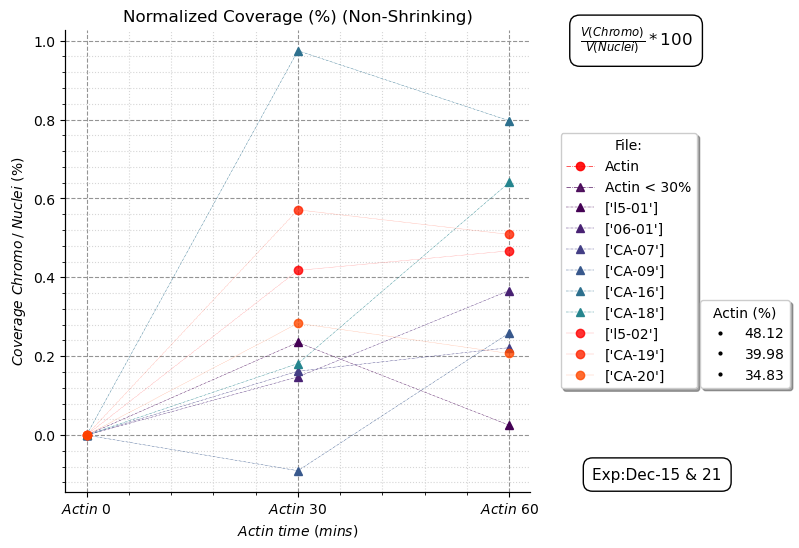

In [16]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from itertools import zip_longest
import matplotlib.colors as colors
import matplotlib.cm as cmx
import itertools
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
# Colormap A
Ncolors_A = 7
colormap_A = plt.cm.autumn#Accent# Set2# autumn # Wistia #cividis #viridis# LinearSegmentedColormap #https://matplotlib.org/stable/tutorials/colors/colormaps.html
Ncolors_A = min(colormap_A.N,Ncolors_A)
mapcolors_A = [colormap_A(int(x*colormap_A.N/Ncolors_A)) for x in range(Ncolors_A)]
# Colormap B
Ncolors_B = 11
colormap_B = plt.cm.viridis#Paired#tab20c# viridis# LinearSegmentedColormap
Ncolors_B = min(colormap_B.N,Ncolors_B)
mapcolors_B = [colormap_B(int(x*colormap_B.N/Ncolors_B)) for x in range(Ncolors_B)]

# =============================================================================
# ACTIN vs ACTIN LESS THAN 30% INFLATING/NON-SHRINKING CHANNEL - <1.2
# FOR 15/12/22 + 21/12/22
#
# Chromocenter Volume Implementation
#(ChromoVolume/NucleiVolume-ChromoVolume[0]/NucleiVolume[0]*100) # Subtracting with T0 Volume and dividing by nuclei volume
# To get the percentage of change for each nuclei compared to the chromocenter
# =============================================================================
# Actin = A && Less than Control = B
# Chromocenter Volume
# ====
# Merging Actin DF First o
df_actin_1 = pd.read_excel('C:/Users/kaabi/Documents/Nuceli_Data/Enucleation/221221 OF1 Enuc D05 Time lapse-Track/Output/Export_Actin_Ovr_30_Less_noShrink_1p2_R2.xlsx')
df_actin_2 = pd.read_excel('C:/Users/kaabi/Documents/Nuceli_Data/Enucleation/221215 OF1 Enuc D05 Time lapse-Track/Output/Export_Actin_Ovr_30_Less_noShrink_1p2_R2.xlsx')
df_actin_A = pd.concat([df_actin_1, df_actin_2])
# ====
#df_actin_A = pd.read_excel('C:/Users/kaabi/Documents/Nuceli_Data/Imaris_to_Py/Output/Export_Actin_Ovr_30_1p2_R2.xlsx')
Chromo_volume_A = pd.DataFrame(df_actin_A, columns= ['VCA_chromo_volume_0','VCA_chromo_volume_1','VCA_chromo_volume_2'])
Chromo_volume_A_np = np.array(Chromo_volume_A)
#Chromo_volume_A_np = np.subtract(Chromo_volume_A_np.T,Chromo_volume_A_np[:,0]).T # to divide each element with T0
# Nuclei Volume
Nuclei_volume_A  = pd.DataFrame(df_actin_A, columns= ['nuclei_vca_0','nuclei_vca_1','nuclei_vca_2'])
Nuclei_volume_A_np = np.array(Nuclei_volume_A)

Chromo_nuclei_rati_A = np.divide(Chromo_volume_A_np,Nuclei_volume_A_np)
Chromo_nuclei_rati_A = np.subtract(Chromo_nuclei_rati_A.T,Chromo_nuclei_rati_A[:,0]).T
Chromo_nuclei_rati_A = np.multiply(Chromo_nuclei_rati_A,100)

# ====
# Merging CTRL DF Second  ^
#df_ctrl_1 = pd.read_excel('C:/Users/kaabi/Documents/Nuceli_Data/Enucleation/221221 OF1 Enuc D05 Time lapse-Track/Output/Export_Ctrl_L_R2.xlsx')
#df_ctrl_2 = pd.read_excel('C:/Users/kaabi/Documents/Nuceli_Data/Enucleation/221215 OF1 Enuc D05 Time lapse-Track/Output/Export_Ctrl_L_R2.xlsx')
#df_ctrl_B = pd.concat([df_ctrl_1, df_ctrl_2])
# Actually ACTIN DATA Transformed for Ctrl plotting for coverage less than 30%
df_ctrl_3 = pd.read_excel('C:/Users/kaabi/Documents/Nuceli_Data/Enucleation/221221 OF1 Enuc D05 Time lapse-Track/Output/Export_Actin_Low_30_Less_noShrink_1p2_R2.xlsx')
df_ctrl_4 = pd.read_excel('C:/Users/kaabi/Documents/Nuceli_Data/Enucleation/221215 OF1 Enuc D05 Time lapse-Track/Output/Export_Actin_Low_30_Less_noShrink_1p2_R2.xlsx')

# Drop Actin Columns
df_ctrl_merge_B = pd.concat([df_ctrl_3, df_ctrl_4])
column_nam = ['actin_area_60', 'actin_area_30']
df_ctrl_merge_B.drop(column_nam, inplace=True, axis=1)
# Better way to fix/Rename Columns
df_ctrl_merge_B.columns = ['Unnamed: 0','File_Name_Ctrl','Ctrl_chromo_volume_0','Ctrl_chromo_volume_1','Ctrl_chromo_volume_2',
           'Ctrl_chromo_volume_3','Ctrl_chromo_count_0','Ctrl_chromo_count_1','Ctrl_chromo_count_2',
           'Ctrl_chromo_count_3','nuclei_ctrl_0','nuclei_ctrl_1','nuclei_ctrl_2','nuclei_ctrl_3',
           'sphericity_ctrl_0','sphericity_ctrl_1','sphericity_ctrl_2','sphericity_ctrl_3','Ratio1',
           'Ratio2']

df_ctrl_B = df_ctrl_merge_B
#
#df_actin_B = pd.read_excel('C:/Users/kaabi/Documents/Nuceli_Data/Imaris_to_Py/Output/Export_Actin_Ovr_30_Less_1p2_R2.xlsx')
##########Chromo_volume_A_np = pd.DataFrame(df_ctrl_A, columns= ['Ctrl_chromo_volume_0','Ctrl_chromo_volume_1','Ctrl_chromo_volume_2'])
Chromo_volume_B = pd.DataFrame(df_ctrl_B, columns= ['Ctrl_chromo_volume_0','Ctrl_chromo_volume_1','Ctrl_chromo_volume_2'])
Chromo_volume_B_np  = np.array(Chromo_volume_B)
#Chromo_volume_B_np = np.subtract(Chromo_volume_B_np.T,Chromo_volume_B_np[:,0]).T
Nuclei_volume_B  = pd.DataFrame(df_ctrl_B, columns= ['nuclei_ctrl_0','nuclei_ctrl_1','nuclei_ctrl_2'])
Nuclei_volume_B_np = np.array(Nuclei_volume_B)

Chromo_nuclei_rati_B = np.divide(Chromo_volume_B_np,Nuclei_volume_B_np)
Chromo_nuclei_rati_B = np.subtract(Chromo_nuclei_rati_B.T,Chromo_nuclei_rati_B[:,0]).T
Chromo_nuclei_rati_B = np.multiply(Chromo_nuclei_rati_B,100)

#df_actin_C = pd.concat([df_actin_B, df_actin_A]) # Merge two experiment readings

# Actin Coverage
Coverage_per_A = pd.DataFrame(df_actin_A, columns= ['actin_area_60'])
Coverage_per_A_np = np.array(Coverage_per_A)

Coverage_per_B = pd.DataFrame(df_ctrl_B, columns= ['actin_area_60'])
Coverage_per_B_np = np.array(Coverage_per_B)
#Coverage_per_B_np = np.concatenate((Coverage_per_A_np, Coverage_per_B_np), axis=0)

# getFileName
FileNum_A = pd.DataFrame(df_actin_A, columns= ['File_Name_VCA'])
FileNum_A_np = np.array(FileNum_A)
FileNum_B = pd.DataFrame(df_ctrl_B, columns= ['File_Name_Ctrl'])
FileNum_B_np = np.array(FileNum_B)


coordinates_A = [
    dict(
        y=Chromo_nuclei_rati_A[i,:], # Comparing rows of timestamps
        x= np.arange(0, len(Chromo_nuclei_rati_A[0]),1),legend =FileNum_A_np[i],
        act_Cov=Coverage_per_A_np[i] )
        #x=len(Chromo_volume_A_np[0])
        
    for i in range(len(Chromo_nuclei_rati_A))
]

coordinates_B = [
    dict(
        y=Chromo_nuclei_rati_B[i,:], # Comparing rows of timestamps
        x= np.arange(0, len(Chromo_nuclei_rati_B[0]),1),legend =FileNum_B_np[i],
        act_Cov=Coverage_per_B_np[i] )
        #x=len(Chromo_volume_A_np[0])
        
    for i in range(len(Chromo_nuclei_rati_B))
]

plot_Label = np.array(['0']) # For empty labelling the legends 

fig, ax = plt.subplots(figsize=(6, 6))
ax2 = ax.twinx()

# Add legend for Actin CTRL
for c,color in zip(plot_Label, mapcolors_A): 
    ax.plot([], [],marker="o", alpha=0.9, color=color,linestyle='-.',linewidth=0.5, label='Actin')
    ax.legend(loc="lower left")
for c,color in zip(plot_Label, mapcolors_B): 
    ax.plot([], [],marker="^", alpha=0.9, color=color,linestyle='-.',linewidth=0.5, label='Actin < 30%')

for c,color in zip(coordinates_B, mapcolors_B):
    #for c,color in zip(coordinates_B, mapcolors):
    #for i,(marker,linestyle,color) in zip(range(N),itertools.product(m_styles,l_styles, mapcolors)):
    ax.plot(c['x'], c['y'],marker="^", alpha=1, color=color,linestyle='-.',linewidth=0.3, label=c['legend'])
    patches = [ plt.plot([],[], marker='^', ms=2, ls="",c='k', mec=None, 
            label="{:.2f}".format(float(Coverage_per_B_np[i])) )[0]  for i in range(len(Coverage_per_B_np)) ]    
    
    # Sync location for Coordinates B
    ax2.legend(handles=patches,loc='center left', bbox_to_anchor=(1.3, 0.5),title="Actin (%)",fancybox=True,shadow=True)
    ax2.axes.get_yaxis().set_visible(False)
    
#Greater than 1.2  A  Shrinkage
#for c,f in zip_longest(coordinates_a, coordinates_b, fillvalue='0'):
for c,color in zip(coordinates_A, mapcolors_A):   
    ax.plot(c['x'], c['y'],marker="o", alpha=0.8, color=color ,linestyle=':',linewidth=0.3, label=c['legend'])
    ax.set_title('Normalized Coverage (%) (Non-Shrinking)')
    categories = [r'$Actin\ 0$',r'$Actin\ 30$', r'$Actin\ 60$']
    ax.set_xticks(range(len(categories)), categories)
    ax.set_ylabel(r'$Coverage\ Chromo\//\ Nuclei\ (\%) $') #(\mu m^{3})
    ax.set_xlabel(r'$Actin\ time\ (mins)$')
    #ax.annotate(c['A2'], xy=(0.5, 0.5), xycoords=ax.transAxes)
    
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.legend()
    ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),title="File:",fancybox=True,shadow=True )
    
    patches = [ plt.plot([],[], marker='o', ms=2, ls="",c='k', mec=None, 
            label="{:.2f}".format(float(Coverage_per_A_np[i])) )[0]  for i in range(len(Coverage_per_A_np)) ]    

    
    ax2.legend(handles=patches,loc='center left', bbox_to_anchor=(1.35, 0.32),title="Actin (%)",fancybox=True,shadow=True)
    ax2.axes.get_yaxis().set_visible(False)

# Experiment Date                           
t = ax.text(
    2.7, -0.1, "Exp:Dec-15 & 21", ha="center", va="center", size=11,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="white", ec="k", lw=1))
bb = t.get_bbox_patch()
bb.set_boxstyle("round", pad=0.6)

t = ax.text(
    2.6, 1, r'$\frac{V(Chromo)}{V(Nuclei)} *100$', ha="center", va="center", size=12,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="white", ec="k", lw=1))
bb = t.get_bbox_patch()
bb.set_boxstyle("round", pad=0.6)

#ax.set_ylim([0, 2.8])
ax.spines[['right', 'top']].set_visible(False)  
ax.grid(which='minor', color='#d6d6d6', linestyle=':')
ax.grid(which='major', color='#949494', linestyle='--')
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.savefig('ChromoVol_NUC_Coverage_Expand_Actin_vs_ACTIN_low30_Dec_22.png', dpi=400, bbox_inches="tight", pad_inches=0.2)
plt.show()    

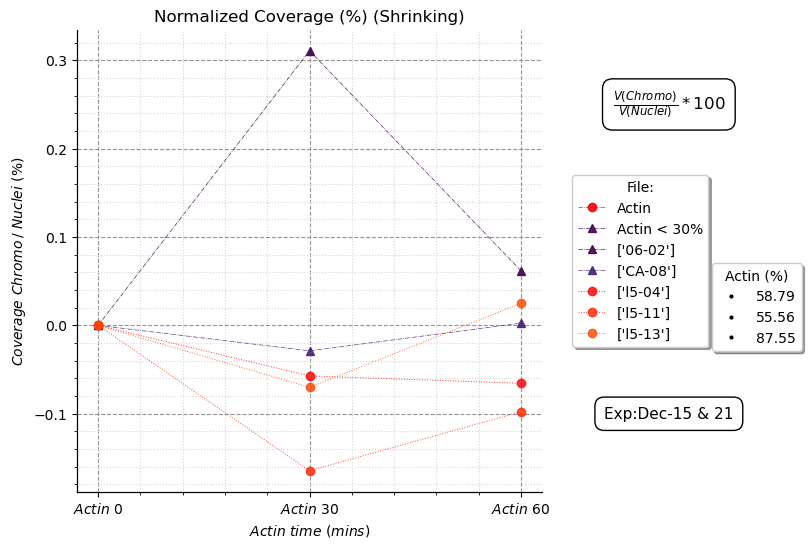

In [17]:
# =============================================================================
# ACTIN vs ACTIN LESS THAN 30% SHRINKING CHANNEL  > 1.2
# FOR 15/12/22 + 21/12/22
#
# Chromocenter Volume Implementation
#(ChromoVolume/NucleiVolume-ChromoVolume[0]/NucleiVolume[0]*100) # Subtracting with T0 Volume and dividing by nuclei volume
# To get the percentage of change for each nuclei compared to the chromocenter
# =============================================================================
# Actin = A && Less than Control = B
# Chromocenter Volume
# ====
# Merging Actin DF First o
df_actin_1 = pd.read_excel('C:/Users/kaabi/Documents/Nuceli_Data/Enucleation/221221 OF1 Enuc D05 Time lapse-Track/Output/Export_Actin_Ovr_30_SHR_1p2_R2.xlsx')
df_actin_2 = pd.read_excel('C:/Users/kaabi/Documents/Nuceli_Data/Enucleation/221215 OF1 Enuc D05 Time lapse-Track/Output/Export_Actin_Ovr_30_SHR_1p2_R2.xlsx')
df_actin_A = pd.concat([df_actin_1, df_actin_2])
# ====
#df_actin_A = pd.read_excel('C:/Users/kaabi/Documents/Nuceli_Data/Imaris_to_Py/Output/Export_Actin_Ovr_30_1p2_R2.xlsx')
#Chromo_volume_A = pd.DataFrame(df_actin_A, columns= ['VCA_chromo_volume_0','VCA_chromo_volume_1','VCA_chromo_volume_2'])
Chromo_volume_A = pd.DataFrame(df_actin_A, columns= ['VCA_chromo_volume_0','VCA_chromo_volume_1','VCA_chromo_volume_2'])
Chromo_volume_A_np = np.array(Chromo_volume_A)
#Chromo_volume_A_np = np.subtract(Chromo_volume_A_np.T,Chromo_volume_A_np[:,0]).T # to divide each element with T0
# Nuclei Volume
Nuclei_volume_A  = pd.DataFrame(df_actin_A, columns= ['nuclei_vca_0','nuclei_vca_1','nuclei_vca_2'])
Nuclei_volume_A_np = np.array(Nuclei_volume_A)

Chromo_nuclei_rati_A = np.divide(Chromo_volume_A_np,Nuclei_volume_A_np)
Chromo_nuclei_rati_A = np.subtract(Chromo_nuclei_rati_A.T,Chromo_nuclei_rati_A[:,0]).T
Chromo_nuclei_rati_A = np.multiply(Chromo_nuclei_rati_A,100)

# ====
# Merging CTRL DF Second  ^
# Actually ACTIN DATA Transformed for Ctrl plotting for coverage less than 30%
df_ctrl_3 = pd.read_excel('C:/Users/kaabi/Documents/Nuceli_Data/Enucleation/221221 OF1 Enuc D05 Time lapse-Track/Output/Export_Actin_Low_30_Over_SHR_1p2_R2.xlsx')
df_ctrl_4 = pd.read_excel('C:/Users/kaabi/Documents/Nuceli_Data/Enucleation/221215 OF1 Enuc D05 Time lapse-Track/Output/Export_Actin_Low_30_Over_SHR_1p2_R2.xlsx')

# Drop Actin Columns
df_ctrl_merge_B = pd.concat([df_ctrl_3, df_ctrl_4])
column_nam = ['actin_area_60', 'actin_area_30']
df_ctrl_merge_B.drop(column_nam, inplace=True, axis=1)
# Better way to fix/Rename Columns
df_ctrl_merge_B.columns = ['Unnamed: 0','File_Name_Ctrl','Ctrl_chromo_volume_0','Ctrl_chromo_volume_1','Ctrl_chromo_volume_2',
           'Ctrl_chromo_volume_3','Ctrl_chromo_count_0','Ctrl_chromo_count_1','Ctrl_chromo_count_2',
           'Ctrl_chromo_count_3','nuclei_ctrl_0','nuclei_ctrl_1','nuclei_ctrl_2','nuclei_ctrl_3',
           'sphericity_ctrl_0','sphericity_ctrl_1','sphericity_ctrl_2','sphericity_ctrl_3','Ratio1',
           'Ratio2']

#df_ctrl_to_actin_Transform.reset_index(drop=True, inplace=True)
#df_ctrl_to_actin_Transform = df_ctrl_to_actin_Transform.rename_axis(None, axis=1)
##df_ctrl_B = pd.concat([df_ctrl_merge_A, df_ctrl_merge_B]) #, join="outer", sort=False
df_ctrl_B =df_ctrl_merge_B
#
#df_actin_B = pd.read_excel('C:/Users/kaabi/Documents/Nuceli_Data/Imaris_to_Py/Output/Export_Actin_Ovr_30_Less_1p2_R2.xlsx')
##########Chromo_volume_A_np = pd.DataFrame(df_ctrl_A, columns= ['Ctrl_chromo_volume_0','Ctrl_chromo_volume_1','Ctrl_chromo_volume_2'])
Chromo_volume_B = pd.DataFrame(df_ctrl_B, columns= ['Ctrl_chromo_volume_0','Ctrl_chromo_volume_1','Ctrl_chromo_volume_2'])
Chromo_volume_B_np  = np.array(Chromo_volume_B)
#Chromo_volume_B_np = np.subtract(Chromo_volume_B_np.T,Chromo_volume_B_np[:,0]).T
Nuclei_volume_B  = pd.DataFrame(df_ctrl_B, columns= ['nuclei_ctrl_0','nuclei_ctrl_1','nuclei_ctrl_2'])
Nuclei_volume_B_np = np.array(Nuclei_volume_B)

Chromo_nuclei_rati_B = np.divide(Chromo_volume_B_np,Nuclei_volume_B_np)
Chromo_nuclei_rati_B = np.subtract(Chromo_nuclei_rati_B.T,Chromo_nuclei_rati_B[:,0]).T
Chromo_nuclei_rati_B = np.multiply(Chromo_nuclei_rati_B,100)

#df_actin_C = pd.concat([df_actin_B, df_actin_A]) # Merge two experiment readings

# Actin Coverage
Coverage_per_A = pd.DataFrame(df_actin_A, columns= ['actin_area_60'])
Coverage_per_A_np = np.array(Coverage_per_A)

Coverage_per_B = pd.DataFrame(df_ctrl_B, columns= ['actin_area_60'])
Coverage_per_B_np = np.array(Coverage_per_B)
#Coverage_per_B_np = np.concatenate((Coverage_per_A_np, Coverage_per_B_np), axis=0)

# getFileName
FileNum_A = pd.DataFrame(df_actin_A, columns= ['File_Name_VCA'])
FileNum_A_np = np.array(FileNum_A)
FileNum_B = pd.DataFrame(df_ctrl_B, columns= ['File_Name_Ctrl'])
FileNum_B_np = np.array(FileNum_B)


coordinates_A = [
    dict(
        y=Chromo_nuclei_rati_A[i,:], # Comparing rows of timestamps
        x= np.arange(0, len(Chromo_nuclei_rati_A[0]),1),legend =FileNum_A_np[i],
        act_Cov=Coverage_per_A_np[i] )
        #x=len(Chromo_volume_A_np[0])
        
    for i in range(len(Chromo_nuclei_rati_A))
]

coordinates_B = [
    dict(
        y=Chromo_nuclei_rati_B[i,:], # Comparing rows of timestamps
        x= np.arange(0, len(Chromo_nuclei_rati_B[0]),1),legend =FileNum_B_np[i],
        act_Cov=Coverage_per_B_np[i] )
        #x=len(Chromo_volume_A_np[0])
        
    for i in range(len(Chromo_nuclei_rati_B))
]

plot_Label = np.array(['0'])

fig, ax = plt.subplots(figsize=(6, 6))
ax2 = ax.twinx()

# Add legend for Actin CTRL
for c,color in zip(plot_Label, mapcolors_A): 
    ax.plot([], [],marker="o", alpha=0.9, color=color,linestyle='-.',linewidth=0.5, label='Actin')
    ax.legend(loc="lower left")
for c,color in zip(plot_Label, mapcolors_B): 
    ax.plot([], [],marker="^", alpha=0.9, color=color,linestyle='-.',linewidth=0.5, label='Actin < 30%')

for c,color in zip(coordinates_B, mapcolors_B):
    #for c,color in zip(coordinates_B, mapcolors):
    #for i,(marker,linestyle,color) in zip(range(N),itertools.product(m_styles,l_styles, mapcolors)):
    ax.plot(c['x'], c['y'],marker="^", alpha=0.9, color=color,linestyle='-.',linewidth=0.5, label=c['legend'])
    patches = [ plt.plot([],[], marker='^', ms=2, ls="",c='k', mec=None, 
            label="{:.2f}".format(float(Coverage_per_B_np[i])) )[0]  for i in range(len(Coverage_per_B_np)) ]    
    
    # Sync location for Coordinates B
    ax2.legend(handles=patches,loc='center left', bbox_to_anchor=(1.3, 0.6),title="Actin (%)",fancybox=True,shadow=True)
    ax2.axes.get_yaxis().set_visible(False)
    
#Greater than 1.2  A  Shrinkage
#for c,f in zip_longest(coordinates_a, coordinates_b, fillvalue='0'):
for c,color in zip(coordinates_A, mapcolors_A):   
    ax.plot(c['x'], c['y'],marker="o", alpha=0.8, color=color ,linestyle=':',linewidth=0.7, label=c['legend'])
    ax.set_title('Normalized Coverage (%) (Shrinking)')
    categories = [r'$Actin\ 0$',r'$Actin\ 30$', r'$Actin\ 60$']
    ax.set_xticks(range(len(categories)), categories)
    ax.set_ylabel(r'$Coverage\ Chromo\//\ Nuclei\ (\%)$') #(\mu m^{3})
    ax.set_xlabel(r'$Actin\ time\ (mins)$')
    #ax.annotate(c['A2'], xy=(0.5, 0.5), xycoords=ax.transAxes)
    
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.legend()
    ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),title="File:",fancybox=True,shadow=True )
    
    patches = [ plt.plot([],[], marker='o', ms=2, ls="",c='k', mec=None, 
            label="{:.2f}".format(float(Coverage_per_A_np[i])) )[0]  for i in range(len(Coverage_per_A_np)) ]    

    
    ax2.legend(handles=patches,loc='center left', bbox_to_anchor=(1.35, 0.4),title="Actin (%)",fancybox=True,shadow=True)
    ax2.axes.get_yaxis().set_visible(False)
 
# Experiment Date                           
t = ax.text(
    2.7, -0.1, "Exp:Dec-15 & 21", ha="center", va="center", size=11,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="white", ec="k", lw=1))
bb = t.get_bbox_patch()
bb.set_boxstyle("round", pad=0.6)

t = ax.text(
    2.7, 0.25, r'$\frac{V(Chromo)}{V(Nuclei)} *100$', ha="center", va="center", size=12,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="white", ec="k", lw=1))
bb = t.get_bbox_patch()
bb.set_boxstyle("round", pad=0.6)

#ax.set_ylim([0, 2.8])
ax.spines[['right', 'top']].set_visible(False)  
ax.grid(which='minor', color='#d6d6d6', linestyle=':') ##ededed,#a8a8a8
ax.grid(which='major', color='#949494', linestyle='--')
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.savefig('ChromoVol_NUC_Coverage_Shrink_Actin_vs_Actin_Low_30_Dec_22.png', dpi=400, bbox_inches="tight", pad_inches=0.2)
plt.show()